# **Calibrando la fotometría y ajustando isócronas**

Antes de comenzar con la calibracion de la CMD en las magnitudes V e I. Comencé recalibrando bien la CMD del cúmulo globular NGC121, hecha en la tarea pasada.


## 1.
Para transformar las magnitudes en F555w y F814w a V e I, respectivamente, se utiliza la siguiente formula:

#### TMAG = SMAG + c0 + c1*TCOL + c2*TCOL²

Donde _TMAG_ es la magnitud al sistema al que quiero llegar, después de la trasnformación, _SMAG_ es la magnitud del sistema previo a la transformación y TCOL corresponde al índice de color.
Para este en rigor, la transformación quedaría de la siguiente forma:

#### V = F555W + 25.250 - 0.090*(V-I) + 0.034*(V-I)²    (1)
#### I = F814W + 24.837 - 0.060*(V-I) - 0.099*(V-I)²     (2)

Sin embargo, no tenemos los valores de de V e I por lo que se aproxima v a F555W e I a F814w, por lo que me quedaría la siguiente transformación.

#### V = F555W + 25.250 - 0.090*(F555W-F814W) + 0.034*(F555w-F814W)²    
#### I = F814W + 24.837 - 0.060*(F555W-F814W) - 0.099*(F555W-F814W)² 

Luego, estos valores los reemplazamos en las ecuaciones (1) y (2) y posteriormente se itera este paso 5 veces para finalmente obtener los valores de V e I finales. 

La fuente ocupada para esta pregunta fue:
> http://iopscience.iop.org/article/10.1086/444553/pdf
    
    

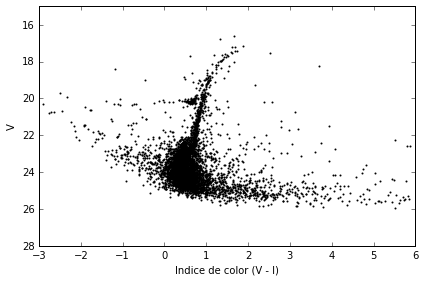

In [25]:
from astropy.coordinates import SkyCoord 
from astropy import units as u 
from astropy.io import ascii 
import numpy as np
import matplotlib.pyplot as plt

# A continuación ocupé el mismo código de la tarea pasada para extraer las magnitudes de los catalogos y de hacer los match.

coords = []  
catalogos = []

cat_f555w = ascii.read('test_f555w.cat') 
catalogos.append(cat_f555w) 
coords.append(SkyCoord(ra=cat_f555w['ALPHA_J2000'], dec=cat_f555w['DELTA_J2000'],unit='deg'))

cat_f814w = ascii.read('test_f814w.cat') 
catalogos.append(cat_f814w) 
coords.append(SkyCoord(ra=cat_f814w['ALPHA_J2000'], dec=cat_f814w['DELTA_J2000'],unit='deg'))

idx, d2d, d3d = SkyCoord.match_to_catalog_sky(coords[0], coords[1]) 

match = list(zip(range(0, len(idx)), idx, d2d)) 

idx1, idx2, d2d = zip(*match) 
catalogos[0] = catalogos[0][list(idx1)] 
catalogos[1] = catalogos[1][list(idx2)]

f555w = list(map(lambda x: x, catalogos[0]['MAG_APER'])) 
f814w = list(map(lambda x: x, catalogos[1]['MAG_APER']))

# procedí a definir la fórmula de para la transformar de las magnitudes VEGAMAG a UBVRI, que mencioné más arriba.

V = list(map(lambda x: x[0]+25.25-0.09*(x[0]-x[1])+0.034*(x[0]-x[1])*(x[0]-x[1]),zip(f555w,f814w)))
I = list(map(lambda x: x[1]+24.84-0.06*(x[0]-x[1])-0.099*(x[0]-x[1])*(x[0]-x[1]),zip(f555w,f814w)))

# A continuación están las iteraciones para aproximar a las magnitudes V e I respectivamente.

for i in range(1, 5):
    V = list(map(lambda x: x[2]+25.25-0.09*(x[0]-x[1])+0.034*(x[0]-x[1])*(x[0]-x[1]),zip(V,I,f555w)))
    I = list(map(lambda x: x[2]+24.84-0.06*(x[0]-x[1])-0.099*(x[0]-x[1])*(x[0]-x[1]),zip(V,I,f814w)))

ejex = list(map(lambda x: x[0]-x[1],zip(V,I)))
ejey = V
plt.scatter(ejex,ejey,marker='o',c='Black',s=1) 
plt.xlabel('Indice de color (V - I)') 
plt.ylabel('V') 
plt.xlim(-3,6)
plt.ylim(15,28)
plt.gca().invert_yaxis()
plt.tight_layout() 
plt.show()

Observando el _CMD_ noto que está bien calibrado, puesto que la magnitud de la rama horizontal del cumulo es V~19.53 que es lo que se puede apreciar del diagrama. 

## 2.


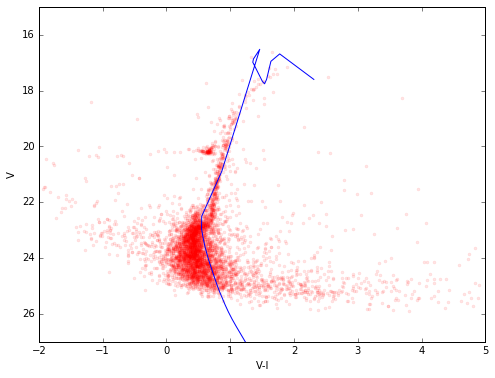

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from isochrones import StarModel
from isochrones.dartmouth import Dartmouth_Isochrone

isocrona = Dartmouth_Isochrone(bands=['V','I'])
edad=np.log10(1*10**10)
metalicidad=-1.5
dist_pc=61000
mod_dist=5*np.log10(dist_pc/10)

Av=0.101
fiteo = isocrona.isochrone(edad,metalicidad,distance=dist_pc,AV=Av)
fit_V = fiteo.V_mag
fit_I = fiteo.I_mag

#Se define el color para la isocrona.

fit_VI = fit_V - fit_I

fig, axis = plt.subplots(figsize=(8,6))
axis.plot(ejex,ejey,'r.',alpha=0.1)
plt.xlim(-2,5)
plt.ylim(15,27)
axis.invert_yaxis()
axis.set_xlabel('V-I')
axis.set_ylabel('V')


plt.plot(fit_VI,fit_V)

plt.show()





> http://slittlefair.staff.shef.ac.uk/teaching/phy241/resources/plotting_isochrones.html fuente para plotear la isocrona.